<div align ="right">Thomas Jefferson University <b>COMP 103</b>: Data Analysis and Visualization</div>

In [58]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

# Comparing means with ANOVA

The next means comparison strategy we will investigate is the ANOVA, or ANalysis Of VAriance. This is a means comparison strategy that is often used in the life sciences. The name can be a bit confusing, as this test detects differences among means by calculating the ratios between different variance components - specifically the ratio of the variance between samples (which corresponds to the variance among species, experimental treatments, localities, or whatever else we may be comparing) to the variance within samples (the error or residual variance, variability in the data that cannot be attributed to our experimental factors).  

Similarly to how the the t-test assigned statistical significance by calculating a t-statistic that is then compared to a table of t-values, the ANOVA assigns statistical significance by calculating an **F-statistic** that is compared to a table of F-values. Most simply this can be represented as:

F = <u>between sample variance</u>   
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;within sample variance

In this notebook we will compare three different types of ANOVA:
* In a **one-way ANOVA**, we will compare multiple sample means
* In a **two-way ANOVA**, we will compare sample means that are affected by more than one experimental factor
* In a **randomized block ANOVA**, which we will just touch on briefly, we will look at how random factors can be analyzed


**Note 1** ANOVAs can get very complicated very quickly! ANOVAs are calculated differently when sample sizes between groups are different or the same, or when the factors included in an ANOVA are fixed (meaningful beyond the bounds of the experiment being considered, such as level of fertilizer applied, or sex of the study organism) or random (meaning factors that might be expected to vary in unpredictable ways, such as different cages in which lab mice are housed, or fields in which plants are grown). Understanding these differences is very important and planning an experiment that requires ANOVA should be done in consultation with a statistician or an experienced practitioner. 

**Note 2** Many of the resources you will find online about using ANOVA will assume that you are using R statistical software. Running an ANOVA in R will have a different syntax than in python, but the fundamentals are very similar. 


# Comparing multiple means with one-way ANOVA

The simplest application of ANOVA is to compare three or more means to one another. If a two-sample t-test asks 'Does sample A differ from sample B?' a one way ANOVA asks 'Do samples A, B, C, ... differ from one another?' 

To say the same thing a different way, the null hypothesis of an ANOVA is that our sample groups are drawn from the same distribution, and are therefore samples of a population with the same mean and variance. The alternative hypothesis is that our samples are drawn from populations with different means.  

Let's load up a dataset. In the `data` folder is a file called `test_aves.csv`. In the code window below, load that dataset up and print out the header to make sure you have it. 

The data set consists of 1000 average exam scores in three areas: calculus, chemistry, and biology.

In [59]:
test_aves = pd.read_csv('data/test_aves.csv', usecols=['calc', 'chem', 'biol'])   ## FIX SUPPRESS INDEX
test_aves.head()

,calc,chem,biol
0,85.618750,78.032658,86.742013
1,80.735941,87.272910,87.041645
2,73.715539,87.070292,90.549435
3,84.758469,84.868836,88.140137
4,81.107428,86.532147,82.976099


Hopefully you see the data in front of you. (If you have peeked at the data you might see that we are ignoring some columns ... we will come back to them with the more complex ANOVAs below right now we are going to pretend that those columns don't exist.) 

First things first, before we start comparing means, let's explore the data. ANOVA has three major assumptions, which are fundamentally the same as the assumptions of regression 1) that the data points are independent of one another 2) that the samples are drawn from a normal distribution, and 3) that the groups being compared have similar variances. Assume that the scores are a random collection of scores from each university, such that each data series in the dataframe is independent, or in other words that the rows don't mean anything. 

Assumption 1) is really a question of experimental design. To start, we will assume that each of these observations is simply a list of the 1000 most recent test averages in each of these disciplines, such that the rows do not represent individual students. That would make things a little trickier, as each student's scores would violate the assumption of independence.

Assumption 2) the normality assumption, is trickier and often mis-stated (try googling it, you will see). An immediate thought might be that we can test this by checking to see if the data is distributed normally, but let's think about that for a second. What if the average test score in each subject was in fact very different? We might expect to see three different curves centered around the average scores for each subject. This would not be a normal distribution of the data! The actual assumption of normality is that the *residuals* are normally distributed. In the case of a one-way ANOVA, that means the differences between the observed data in each group and the mean of each group should themselves be normally distributed.

Assumption 3) is relatively straightforward. Each group must have similar variances. This compares to the regression assumption that variance in y stays constant as the value of x increases, but this is now translated into a situation in which we are comparing different discrete groups. 



### Exercise 1. 

In the code window below, take a pass at using the tools we have learned so far to demonstrate that each of these three conditions is met. You can use visualizations or other statistical tests to do so. You may want to compare the variance directly, plot the data with a histogram, or use the Q-Q plot introduced in the t-test section. 


              calc         chem         biol
count  1000.000000  1000.000000  1000.000000
mean     82.134949    85.040435    88.188919
std       3.997851     4.123261     4.140144
min      69.479334    69.980540    73.520977
25%      79.296607    82.494599    85.228198
50%      82.020194    85.038547    88.292955
75%      84.805774    87.810428    91.009472
max      95.250387    98.055125    99.983518



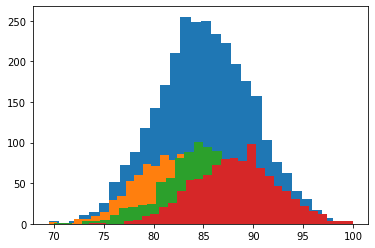


skewtest
all SkewtestResult(statistic=0.3274471158975927, pvalue=0.7433297354613322)
calc SkewtestResult(statistic=0.9924956748062979, pvalue=0.3209557882994559)
chem SkewtestResult(statistic=-1.6094505201034546, pvalue=0.10751786606539863)
biol SkewtestResult(statistic=-0.739693691750071, pvalue=0.4594858766737874)

shapiro
all ShapiroResult(statistic=0.9993201141271568, pvalue=0.3470172192895391)
calc ShapiroResult(statistic=0.9989197589207398, pvalue=0.8290311575270382)
chem ShapiroResult(statistic=0.997597020227729, pvalue=0.15159527970630093)
biol ShapiroResult(statistic=0.9988591222817969, pvalue=0.7924917075688567)

normaltest
all NormaltestResult(statistic=4.716541994640028, pvalue=0.09458361722890887)
calc NormaltestResult(statistic=1.2240228361485532, pvalue=0.5422590617243912)
chem NormaltestResult(statistic=4.7559931909925925, pvalue=0.092736179610111)
biol NormaltestResult(statistic=1.2156795389099107, pvalue=0.5445259009314558)

kurtosistest
all KurtosistestResult(statis

In [60]:
###
### Your code here
###
print(test_aves.describe())

print ()

###
all_tests = test_aves['calc'].to_list() + test_aves['chem'].to_list() + test_aves['biol'].to_list()
plt.hist(all_tests,30)
plt.hist(test_aves['calc'], 30)
plt.hist(test_aves['chem'], 30)
plt.hist(test_aves['biol'], 30)

plt.show()

###

print()
print('skewtest')
print('all', stats.skewtest(all_tests))
print('calc', stats.skewtest(test_aves['calc']))
print('chem', stats.skewtest(test_aves['chem']))
print('biol', stats.skewtest(test_aves['biol']))

print()
print('shapiro')
print('all', stats.shapiro(all_tests))
print('calc', stats.shapiro(test_aves['calc']))
print('chem', stats.shapiro(test_aves['chem']))
print('biol', stats.shapiro(test_aves['biol']))

print()
print('normaltest')
print('all', stats.normaltest(all_tests))
print('calc', stats.normaltest(test_aves['calc']))
print('chem', stats.normaltest(test_aves['chem']))
print('biol', stats.normaltest(test_aves['biol']))

print()
print('kurtosistest')
print('all', stats.kurtosistest(all_tests))
print('calc', stats.kurtosistest(test_aves['calc']))
print('chem', stats.kurtosistest(test_aves['chem']))
print('biol', stats.kurtosistest(test_aves['biol']))

# NEED QQ PLOT CODE HERE


In this case a p value of < 0.05 would indicate that we were observing a significant deviation from normality. We observe that only for kurtosis of the combined data. These are very powerful tests of deviations from normality.

The most important data are actually in our first two results, from which we can see that the standard deviations for each group are approximately equal and each group is an approximately normal distribution.

Notice that none of these test directly answered the question of whether the residuals were normally distributed. In order to do that we would first have to run a statistical test in order to generate the residuals. 

In a future iteration we will introduce the conept of a Q-Q plot here, you can read about it to see what that looks like ... https://en.wikipedia.org/wiki/Q–Q_plot

### Running a one-way ANOVA

In a one-way ANOVA we just want to compare groups means. In some ways this is the last of the "simple" tests. 
To run a one-way anova within stats we can use the `stats.f_oneway(group0, group1 ... groupN)`function from the stats library. Each `group` needs to be a data series. 


### Exercise 2. 

Using the code above. Run a one-way anova comparing calc, chem, and biology scores from the `test_aves` data.  

Create a boxplot of the means to compare this data to. What do we see?

In [61]:
stats.f_oneway(test_aves['calc'], test_aves['chem'], test_aves['biol'])

F_onewayResult(statistic=548.6829747046579, pvalue=8.982125828141596e-204)

### Question 1

As best you can interpret the output above. What does it tell you? What doesn't it tell you? Does it match what you expect from the boxplot output?

 * 
 *
 *

## Post hoc tests with one-way ANOVA
I think you will agree that the results that we got from the one-way ANOVA were kind of underwhelming - we fot an F statistic and a (highly significant) p value. But we don't get any statements about *what* is significant or what difference between groups might be driving the observed difference. This simple p value just tells us that the groups are not drawn from the same distribution. 

It would be useful to know more. To determine which groups are different from one another, we need to do what is known as a post-hoc test. The test we would use in this circumstance is the Tukey HSD test, where HSD means Highly Significant Differences. 

The syntax for this test is very simple and follows the model of the one-way ANOVA:  `stats.tukey_hsd(group0, group1 ... groupN)`.

In [62]:
print(stats.tukey_hsd(test_aves['calc'], test_aves['chem'], test_aves['biol']))

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -2.905     0.000    -3.334    -2.477
 (0 - 2)     -6.054     0.000    -6.483    -5.625
 (1 - 0)      2.905     0.000     2.477     3.334
 (1 - 2)     -3.148     0.000    -3.577    -2.720
 (2 - 0)      6.054     0.000     5.625     6.483
 (2 - 1)      3.148     0.000     2.720     3.577



This table gives us the comparison between each group, so `Comparison (0 - 1)` refers to a comparison between group 0 and group 1. 

### Question 2 
What is this table telling us in terms of biology, chemistry, and calculus scores. How would this table differ if chemistry and biology scores were not different from one another? 

 * 
 * 
 * 

## ANOVA tables and `statsmodels`
Reporting an ANOVA is more complicated than just F, and p, however. ANOVA results are generally reported in a stereotyped format known as an ANOVA table. One problem with the stats library is that it's reporting functions are very rudimentary and we aren't getting all of the information that we would want to get. 

We also don't have any way to access additional information from the ANOVA analysis - such as how the variances in the test were partitioned - since the `stats` anova approach is so simple. 

In order to move forward into more complicated analyses we need to go to a different, more sophisticated tool. The one that is going to give us the most flexibility is the `statsmodels` library which we will see improves reporting AND gives us the flexibility to do different types of ANOVA. 

`statsmodels` is, as the name implies, a models-based approach. In essence what we are going to do is to create a statistical model which is fit to the data. 

An important thing about statsmodels is that we can't use it on just any data structure. We need the datat to be in a fully-expanded of long formal. Our data is pretty simple so we can use the handy pandas function `melt` to do this conversion. 


In [63]:
import statsmodels as sm
from statsmodels.formula.api import ols         # ols = Ordinary Least Squares regression
from statsmodels.stats.anova import anova_lm    # anova_lm = organizes a linear model into
                                                ## an ANOVA format
test_aves_long = test_aves.melt(var_name = "subject", value_name = "average")
print(test_aves_long)



     subject    average
0       calc  85.618750
1       calc  80.735941
2       calc  73.715539
3       calc  84.758469
4       calc  81.107428
...      ...        ...
2995    biol  89.004067
2996    biol  84.516857
2997    biol  87.993931
2998    biol  92.449446
2999    biol  87.861511

[3000 rows x 2 columns]


### Question 3
In your own words, what did `melt()` do? What kind of data does `melt()` work on? What is `melt()` and what library does it belong to? What are the arguments?

 * 
 * 
 * 





### Running a one-way ANOVA in statsmodels and making an ANOVA table 

Now that the data is in a long format we can apply the model. 

The model uses the tilde as an operator. This follows the pattern of the R language, and in fact, the statsmodels library is a way of running 'R-type' statistical models in python. The first value in the model is y - which in our 'melted' data set is the column 'average'. Our second value is our x value, 'subject' The C operator lets the model know that this is categorical data, and not a continuous x value (for say, performing a regression). 

This is what that syntax looks like, go ahead and run it: 

In [64]:
model = ols('average ~ C(subject)', data = test_aves_long).fit()
one_way_table = anova_lm(model, typ=2)
one_way_table

,sum_sq,df,F,PR(>F)
C(subject),18335.117141,2.0,548.682975,8.982126e-204
Residual,50074.768678,2997.0,NaN,NaN


### Question 3

Did this give us the same result as before? How do you know? What else is being reported in this table. Why might this be useful? Which do you prefer?

 * 
 * 
 * 

Why does it make sense that the data would be "melted" to get this result?

 * 
 * 
 * 



### post hoc tests with statsmodels



In [65]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

pairwise = pairwise_tukeyhsd(test_aves_long['average'],test_aves_long['subject'] )
print(pairwise)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
  biol   calc   -6.054   0.0 -6.4826 -5.6253   True
  biol   chem  -3.1485   0.0 -3.5771 -2.7198   True
  calc   chem   2.9055   0.0  2.4768  3.3341   True
---------------------------------------------------


### Question 4

How does this compare to our previous results? Is this a better approach?

 * 
 * 
 * 




# Two-way analysis of variance

You have seen that statsmodels gives you much better and interpretable results from an ANOVA than the base stats package. It's real power, however, is when we want to run more complicated models. The next step for us means running ANOVAs where we have more than one variable for categorizing the data. 

Let's read in the full dataset below. We will drop our initial assumption that all of this data came from the same population and see that we now have scores classified by student sex and by the university at which the data was collected. 



In [66]:
test_data = pd.read_csv('data/test_aves.csv')
test_data.head()

,univ,sex,calc,chem,biol
0,ASU,M,85.618750,78.032658,86.742013
1,BSU,F,80.735941,87.272910,87.041645
2,CSU,M,73.715539,87.070292,90.549435
3,DSU,F,84.758469,84.868836,88.140137
4,ASU,M,81.107428,86.532147,82.976099


The point of a two way anova is to attribute variation to two variables at the same time. Let's look at the situation where we compare `subject` and `sex`. Each of these *factors* or predictor variables is going to act like an individual 'x' variable or grouping factor. We still have a single 'y'  variable in our scores. 

We are going to ask our test if there is a difference in subject (which we already know there is) and if there is a difference in sex (which we don't know). We also have to include a term called an **interaction** factor. An interaction occurs when the effect of two factors are not independent of one another. The interaction factor in the model tests for that independence. If the factors are not independent, post-hoc tests are not possible. We will return to interactions later. 

The first thing we need to do is remelt the data down into a long form (notice how we identify that there are multiple categorical variables associated with each data point):

In [67]:
test_data_long = test_data.melt(id_vars = ['univ', 'sex'],var_name = "subject", value_name = "average")
test_data_long.head()

,univ,sex,subject,average
0,ASU,M,calc,85.618750
1,BSU,F,calc,80.735941
2,CSU,M,calc,73.715539
3,DSU,F,calc,84.758469
4,ASU,M,calc,81.107428


The functions that we use to run a two-way ANOVA model are the same as the ones that we use to run a one way, we will just set up our equation differently. 

The `*` operator means that we will use the factors `subject` and `sex` as predictor variables in our model and that we will also consider the interaction between these two variables. We could have used the syntax:
```
ols('average ~ C(subject) + C(sex) + C(subject):C(sex)', data = test_data_long).fit()
```
and we would get the exact same result. The `:` represents the interaction as you will see in the results table below. We will print the ANOVA table and a results summary from the linear regression model:

In [68]:
model2way = ols('average ~ C(subject)*C(sex)', data = test_data_long).fit()
two_way_table = anova_lm(model2way, typ=2)
two_way_table

,sum_sq,df,F,PR(>F)
C(subject),18335.117141,2.0,548.547506,1.059519e-203
C(sex),4.006422,1.0,0.239727,6.244391e-01
C(subject):C(sex),33.764419,2.0,1.010159,3.642851e-01
Residual,50036.997837,2994.0,NaN,NaN


In [69]:

print(model2way.summary())

                            OLS Regression Results                            
Dep. Variable:                average   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.267
Method:                 Least Squares   F-statistic:                     219.9
Date:                Mon, 24 Feb 2025   Prob (F-statistic):          2.82e-200
Time:                        15:05:10   Log-Likelihood:                -8478.0
No. Observations:                3000   AIC:                         1.697e+04
Df Residuals:                    2994   BIC:                         1.700e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

### Question 5
Looking just at the ANOVA table, which of the three model factors are significant at the p<0.05 level? How would you interpret this result in common language. Do we need to do any additional post_hoc testing to understand this result?

 * 
 * 
 * 


Looking at the summary - what does the R^2 value mean at the top of the regression results?
What does your intuition tell you that the 'coefficient' variables mean in the lower part of the summary table? How about `P>|t|`?


 * 
 * 
 * 



## Wrap up and exercises

Since there is no interaction between sex and subject, if we wanted to run a post-hoc test on this data we could run our Tukey test again. If there is an interaction, that wouldn't work. We will demonstrate this with Exercise 1. 

### Exercise 1 
Run the code window below. Comment the code and explain step by step what is happening. Explain the ols model used. Assume that you are looking at two plant species A and B that are receiving or not receiving a growth treatment. Interpret the results. Then make a line graph that shows  the average values of the species in each treatment combination. Interpret this graph. Why does this graph show an **interaction**

In [70]:
df_int =  pd.DataFrame(
    {'species': ['A','A','A','A','B','B','B','B'],
    'condition':  ['X','C','X','C','X','C','X','C'],
    'measurement':  [42, 35, 41, 34, 33, 36, 35, 34]})
df_int


model_int = ols('measurement ~ C(species)*C(condition)', data = df_int).fit()
two_way_table = anova_lm(model_int, typ=2)
two_way_table

,sum_sq,df,F,PR(>F)
C(species),24.5,1.0,19.6,0.011447
C(condition),18.0,1.0,14.4,0.019190
C(species):C(condition),32.0,1.0,25.6,0.007182
Residual,5.0,4.0,NaN,NaN


### Exercise 1 answer here:

 * 
 * 
 * 

### Exercise 2:

Re-analyze the test average data. Plot histograms of the data by university to get a sense of what is going on before you start. Do a two-way anova in which you consider the factors university and subject. Make an ANOVA table, and present the data summary. Do you see an interaction? Do a post-hoc test on the university factor, and interpret it. 


In [71]:
#
## your code here
#

![TJU logo image](images/TJU_logo_image.png "TJU logo image")